## SETUP

This project requires Python 3.7 or above:

In [6]:
import sys
assert sys.version_info >= (3, 7)

And TensorFlow ≥ 2.8:

In [7]:
from packaging import version
import tensorflow as tf
import pandas as pd
import numpy as np
assert version.parse(tf.__version__) >= version.parse("2.8.0")

Define the default font sizes to make the figures prettier

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Prepare the Data

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train / 255
x_test = x_test / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the Model

In [10]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the Model

In [11]:
# extract variables for easy editing
batch_size = 1
epochs = 30
validation_split=0.1
monitor_criteria = 'val_loss'
patience_criteria = 5

loss_criteria = "categorical_crossentropy"
optimizer_method = "adam"
accuracy_metrics = ["accuracy"]

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor=monitor_criteria, patience=patience_criteria) #implement early stopping callback

model.compile(loss=loss_criteria, optimizer=optimizer_method, metrics=accuracy_metrics)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=[early_stopping_callback])

Epoch 1/30
54000/54000 [==============================] - 74s 1ms/step - loss: 0.1586 - accuracy: 0.9508 - val_loss: 0.0486 - val_accuracy: 0.9852
Epoch 2/30
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0889 - accuracy: 0.9733 - val_loss: 0.0415 - val_accuracy: 0.9883
Epoch 3/30
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0823 - accuracy: 0.9764 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 4/30
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0777 - accuracy: 0.9777 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 5/30
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.0492 - val_accuracy: 0.9882
Epoch 6/30
54000/54000 [==============================] - 73s 1ms/step - loss: 0.0776 - accuracy: 0.9788 - val_loss: 0.0482 - val_accuracy: 0.9870
Epoch 7/30
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0754 - accuracy: 0.9789 - val_loss: 0

## Visualize the Training Process

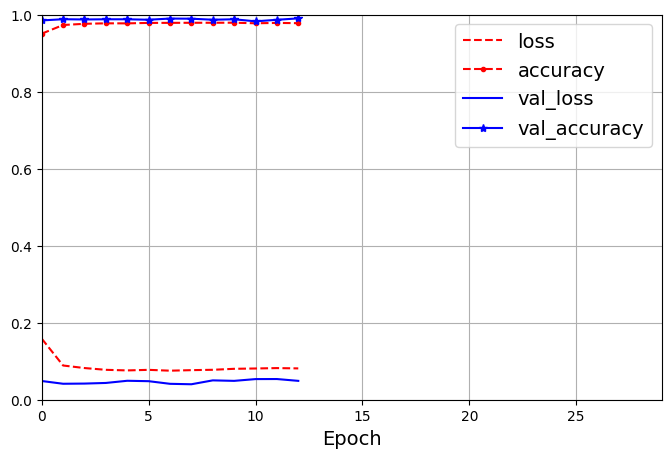

In [12]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

## Evaluate the Trained Model

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Test loss: 0.047075770795345306
Test accuracy: 0.9879000186920166
